# Reto sample

### Descriptivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("MDF_US.csv")

In [3]:
df.head()

,cm_id,claim_id,start_date,end_date,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id
0,24281,7901,2020-01-12T00:00:00.000+0000,2020-01-18T00:00:00.000+0000,4H- (7CC47AA),HP OfficeJet 5255 All-in-One Printer,M2U75A,10000.0,9008,Ad Funds - Inkjet Printers FY'20 H12,MARKET DEVELOPMENT FUNDS,Ad Funding,Best Buy,Approved,HPS HW,Program,Advertising
1,50220,20134,2022-07-24T00:00:00.000+0000,2022-07-30T00:00:00.000+0000,MS- (544H8A),HyperXStingerCoreW+7.1HHSS1C-BA-BK/G,4P4F0AA,180.0,HAIS-MC-X00622,Micro Center July Promo 7/3/2022-7/30/2022\t\t,undefined,Instant Savings,Microcenter,Pending,HyperX,UNKNOWN,UNKNOWN
2,24139,7991,2020-01-15T00:00:00.000+0000,2020-01-30T00:00:00.000+0000,IF- (7CD16AA),HP Sprocket Studio Bundle,8SU11A,3624.0,10113,CP - Add Missed Paper to Studio at NAE,MARKET DEVELOPMENT FUNDS,In-Store Merchandising Enhancement,New Age,Approved,HPS HW,Program,Advertising
3,48720,19471,2022-05-01T00:00:00.000+0000,2022-05-07T00:00:00.000+0000,MS- (544H8A),HyperXCloudBluePS5HHSC2-FA-BL,4P5H9AA,913.5,HAIS-TG-X01022,Target May Promo 5/1/2022-6/4/2022,undefined,Instant Savings,Target,Approved,HyperX,UNKNOWN,UNKNOWN
4,50238,20134,2022-07-03T00:00:00.000+0000,2022-07-09T00:00:00.000+0000,MS- (544H8A),HyperXCloudXFlightHX-HSCFX-BK/WW,4P5J6AA,40.0,HAIS-MC-X00622,Micro Center July Promo 7/3/2022-7/30/2022\t\t,undefined,Instant Savings,Microcenter,Pending,HyperX,UNKNOWN,UNKNOWN


## Drop columns

In [4]:
df.drop(labels=["start_date", "end_date"], axis=1, inplace=True)

In [5]:
df.head()

,cm_id,claim_id,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id
0,24281,7901,4H- (7CC47AA),HP OfficeJet 5255 All-in-One Printer,M2U75A,10000.0,9008,Ad Funds - Inkjet Printers FY'20 H12,MARKET DEVELOPMENT FUNDS,Ad Funding,Best Buy,Approved,HPS HW,Program,Advertising
1,50220,20134,MS- (544H8A),HyperXStingerCoreW+7.1HHSS1C-BA-BK/G,4P4F0AA,180.0,HAIS-MC-X00622,Micro Center July Promo 7/3/2022-7/30/2022\t\t,undefined,Instant Savings,Microcenter,Pending,HyperX,UNKNOWN,UNKNOWN
2,24139,7991,IF- (7CD16AA),HP Sprocket Studio Bundle,8SU11A,3624.0,10113,CP - Add Missed Paper to Studio at NAE,MARKET DEVELOPMENT FUNDS,In-Store Merchandising Enhancement,New Age,Approved,HPS HW,Program,Advertising
3,48720,19471,MS- (544H8A),HyperXCloudBluePS5HHSC2-FA-BL,4P5H9AA,913.5,HAIS-TG-X01022,Target May Promo 5/1/2022-6/4/2022,undefined,Instant Savings,Target,Approved,HyperX,UNKNOWN,UNKNOWN
4,50238,20134,MS- (544H8A),HyperXCloudXFlightHX-HSCFX-BK/WW,4P5J6AA,40.0,HAIS-MC-X00622,Micro Center July Promo 7/3/2022-7/30/2022\t\t,undefined,Instant Savings,Microcenter,Pending,HyperX,UNKNOWN,UNKNOWN


## Separate unknowns and null from our training set

In [6]:
mask_unknown = (df["activity_subtype"] == "UNKNOWN") | (df["activity_subtype"].isna())

In [7]:
df_pred = df[mask_unknown] # The dataset with UNKNOWNS or null values. We will try to predict these in the end
df = df[~mask_unknown] # The dataset without these values. We will be using this one for the training.

In [8]:
df.shape # The shape of our new dataset.

(3762, 15)

## Data exploration

In [9]:
df.describe()

,cm_id,claim_id,totalamount
count,3762.000000,3762.000000,3.762000e+03
mean,40893.980861,15430.855130,5.715417e+04
std,11959.971430,5397.084816,1.536897e+05
min,22233.000000,7540.000000,-1.329640e+03
25%,29289.250000,8853.500000,2.215330e+03
50%,41116.500000,15479.000000,1.250000e+04
75%,51043.250000,20405.500000,4.756950e+04
max,61673.000000,24006.000000,2.708592e+06


In [10]:
df["activity_subtype"].unique().size

9

In [11]:
df_cat = df.groupby("activity_subtype")

In [12]:
df_bar = df.groupby("activity_subtype").count()
df_bar["cm_id"]

activity_subtype
BTB             51
BTS            115
Digital         54
Display        339
Email          125
Holiday        247
Program       2435
Search         344
Trad_media      52
Name: cm_id, dtype: int64

## Bar plot

<BarContainer object of 9 artists>

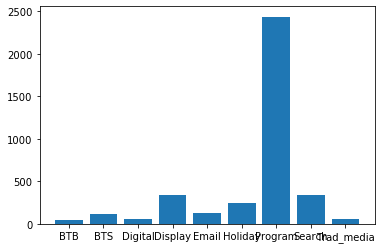

In [13]:
x = df_bar["cm_id"]
labels = x.index
plt.bar(labels, x)

In [14]:
labels

Index(['BTB', 'BTS', 'Digital', 'Display', 'Email', 'Holiday', 'Program',
       'Search', 'Trad_media'],
      dtype='object', name='activity_subtype')

## Holiday

In [15]:
holiday = df[df["activity_subtype"] == "Holiday"]
holiday.head()

,cm_id,claim_id,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id
40,56968,22531,1M- (4XM00A),27-CA0070,318D6AA,2100.00,AAD-DH-D13022,D&H Black Friday DT 2022 Program,undefined,Ad Funding,D&H,Approved,PC,Holiday,Black_Friday
58,55295,21971,1M- (4XM00A),GT15-0304,575P7AA,68585.00,AIS-BB-D10922,Best Buy Black Friday Desktop IRs 2022,undefined,Instant Savings,Best Buy,Approved,PC,Holiday,Black_Friday
92,44843,17271,IR -(7RB50A),NaN,NaN,7250.00,12011,ASP: HPS EGG Diamond Package,undefined,Ad Funding,Amazon,Approved,HPS HW,Holiday,Holiday
94,44846,17271,5M- (7CC52AA),NaN,NaN,28833.33,12011,ASP: HPS EGG Diamond Package,undefined,Ad Funding,Amazon,Approved,HPS HW,Holiday,Holiday
103,44840,17271,2N- (7CC42AA),NaN,NaN,18000.00,12011,ASP: HPS EGG Diamond Package,undefined,Ad Funding,Amazon,Approved,HPS HW,Holiday,Holiday


In [25]:
holiday["program_name"]

40            D&H Black Friday DT 2022 Program
58      Best Buy Black Friday Desktop IRs 2022
92               ASP: HPS EGG Diamond Package 
94               ASP: HPS EGG Diamond Package 
103              ASP: HPS EGG Diamond Package 
                         ...                  
7865              ASP: OPS EGG Diamond Package
7941       2c'22 New Age/Newegg Gaming/Program
7984                    NotebookEOLHoliday2021
8066    Best Buy Black Friday Desktop IRs 2022
8074             ASP: HPS EGG Diamond Package 
Name: program_name, Length: 247, dtype: object

Si el activity subtype es <strong>"Holiday"</strong> el activity subtype id solo puede ser <strong>Black Friday</strong> o <strong>Holiday</strong>

## Business type

In [18]:
df_cat["business_type"].value_counts().index[:5] # BUSINESS TYPE

MultiIndex([('BTB',               'HPS HW'),
            ('BTB',               'OPS HW'),
            ('BTB',        'Ink and Media'),
            ('BTB', 'OPS HW A4 & Scanners'),
            ('BTB',            'OPS Toner')],
           names=['activity_subtype', 'business_type'])

## BTB

In [20]:
btb = df[df["activity_subtype"] == "BTB"].head(3)
btb

,cm_id,claim_id,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id
64,23510,7831,5M- (7CC52AA),ENVY 7855 Photo,K7R96A,3570.00,9875,Trade-in Program for BTB,SPECIAL NEGOTIATED DISCOUNT,MIR,Office Depot,Approved,HPS HW,BTB,BTB
187,25439,7870,2Q- (7CC44AA),CLJ Pro M281fdw MFP,T6B82A,18500.00,9875,Trade-in Program for BTB,SPECIAL NEGOTIATED DISCOUNT,MIR,Office Depot,Approved,HPS HW,BTB,BTB
263,33039,11080,2Q- (7CC44AA),NaN,NaN,45362.27,10007,ASP - Staples BOPIS - BTB & STS,SPECIAL NEGOTIATED DISCOUNT,MIR,Staples,Approved,HPS HW,BTB,BTB


No logramos encontrar ningún patrón en los datos, a excepción de la columna "program name" la cual contiene la palabra "BTB" en casi todas las entradas.

## Display

In [58]:
 display = df[df["activity_subtype"] == "Display"]

In [64]:
display["program_name"].str.contains("Always On Banners")

77      False
82      False
83      False
90       True
120     False
        ...  
7981    False
8017    False
8021    False
8057    False
8059    False
Name: program_name, Length: 339, dtype: bool

## START

In [169]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

We have noticed that the only columns that gives us information about the activity subtype is the program name. For this reason, we will be focusing only on that column. 

A new dataset was provided to us, we will be merging these two datasets and using them as our training set.

## Merging dataset

In [170]:
df1 = pd.read_csv("MDF_US.csv", usecols=["program_name", "activity_subtype","activity_subtype_id","reseller"])
df2 = pd.read_csv("aspcliamsdb_r_sptkpi.csv",usecols=["program_name", "activity_subtype","activity_subtype_id","reseller"])

In [171]:
# mask of UNKNOWN and NULL
mask_unknown1 = (df1["activity_subtype"] == "UNKNOWN") | (df1["activity_subtype"].isna())
mask_unknown2 = (df2["activity_subtype"] == "UNKNOWN") | (df2["activity_subtype"].isna())

In [172]:
df2 = df2[~mask_unknown2] # we apply the filter
df1 = df1[~mask_unknown1]

In [173]:
df1.shape, df2.shape # These are the final two dataframes that we want to concatenate

((3762, 4), (11850, 4))

We concatenate both DataFrames

In [174]:
df = pd.concat([df1, df2],ignore_index=True)

## We observe our new DataFrame

In [25]:
df.head()

,cm_id,claim_id,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id
0,24281,7901,4H- (7CC47AA),HP OfficeJet 5255 All-in-One Printer,M2U75A,10000.00,9008,Ad Funds - Inkjet Printers FY'20 H12,MARKET DEVELOPMENT FUNDS,Ad Funding,Best Buy,Approved,HPS HW,Program,Advertising
2,24139,7991,IF- (7CD16AA),HP Sprocket Studio Bundle,8SU11A,3624.00,10113,CP - Add Missed Paper to Studio at NAE,MARKET DEVELOPMENT FUNDS,In-Store Merchandising Enhancement,New Age,Approved,HPS HW,Program,Advertising
6,60131,23533,KV- (4XM40A),15-EU1073CL,644F0UA,875.00,AIS-CO-N01123,Costco C2'22 Warehouse NB IR Program,undefined,Instant Savings,Costco,Approved,PC,Program,Other
7,40575,15308,GJ- (7CC96AA),NaN,NaN,91121.22,11272,Q2 21 Toner 1% CX Program,Sales goal Attainment,Margin Enhancement,Amazon,Reversed,Toner,Program,Other
8,26017,8399,4H- (7CC47AA),NaN,NaN,27604.41,9842,ASP - CQ1'20 Printer Share Agreement,Sales goal Attainment,Margin Enhancement,Costco,Approved,HPS HW,Program,Other


In [176]:
df["activity_subtype"].unique()

array(['Program', 'Search', 'Trad_media', 'Digital', 'Holiday', 'BTS',
       'BTB', 'Display', 'Email'], dtype=object)

In [177]:
display = df[df["activity_subtype"] == "Display"]
program = df[df["activity_subtype"] == "Program"]
search = df[df["activity_subtype"] == "Search"]
trad = df[df["activity_subtype"] == "Trad_media"]
digital = df[df["activity_subtype"] == "Digital"]
holiday = df[df["activity_subtype"] == "Holiday"]
bts = df[df["activity_subtype"] == "BTS"]
btb = df[df["activity_subtype"] == "BTB"]
email = df[df["activity_subtype"] == "Email"]

## Display

In [178]:
display["program_name"]

39                           Retail Store Rewards Banner 
44               ASP - May-July HV Online Digital Program
45                        CP: OPS - AB CE Showcase Banner
47                              Always On Banners Dec-Feb
60                   VPA Aarons H1 2022 Demand Generation
                               ...                       
15602    Bestbuy.com via NAE Cycle Funding 2022 (Mar-Oct)
15604                 Costco.com Desktop C2'22 IR Program
15608                     Walmart.com Margin Jul-Sep 2021
15609                     Walmart.com Margin Jul-Sep 2021
15610                      Costco.com C2'22 NB IR Program
Name: program_name, Length: 1957, dtype: object

## CNN for NLP 

In [129]:
import re
import calendar
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
categories = df["activity_subtype"].unique()
df = df[ df["activity_subtype"].isin(categories) ]
df["activity_subtype"].reset_index().groupby("activity_subtype").count().sort_values(by="index", ascending=False)

,index
activity_subtype,
Program,8735
Display,1957
Search,1216
BTB,1057
Holiday,1016
BTS,803
Email,429
Digital,210
Trad_media,189


In [231]:
def preprocess_text(text, stopwords=None):
    '''
    Preprocess a string.
    :parameter
        :param text: string - name of column containing text
        :param stopwords: list - list of stopwords to remove
    :return
        cleaned text
    '''
    ## Replace some punctuations for space
    chars = [".", "-", " - ", ",", "´" ,"'", "\\", "/"]
    for char in chars:
        text = text.replace(char, " ")
    
    ## Tokenize (convert from string to list)
    list_text = text.split()
    
    ## Remove numbers
    new_text = []
    for el in list_text:
        if el.isalpha(): # Check if the string is purely alphabetic. We don´t want alphanumeric values.
            new_text.append(el)   
    
    list_text = [i.lower() for i in new_text]
    ## Remove Stopwords
    if stopwords is not None:
        list_text = [word.lower() for word in list_text if word not in stopwords]
        
    ## back to string from list
    text = " ".join(list_text)
        
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
    return text

In [180]:
stopwords = nltk.corpus.stopwords.words("english")
months = calendar.month_name[1:]
cut_months = [i[:3] for i in calendar.month_name[1:]]
resellers = list(df["reseller"].unique())
extras = ["com", "org"]

added_stopwords = stopwords + months + cut_months + resellers + extras
added_stopwords = [i.lower() for i in added_stopwords]

In [192]:
example = df.iloc[15608,:]["program_name"]
example2 = df.iloc[215,:]["program_name"]
example3 = df.iloc[3, :]["program_name"]

In [193]:
example, example2, example3

('Walmart.com Margin Jul-Sep 2021',
 "FQ3'22 Notebook EOL Program",
 'Q2 21 Toner 1% CX Program')

In [195]:
preprocess_text(example, added_stopwords), preprocess_text(example2, added_stopwords), preprocess_text(example3, added_stopwords)

('margin', 'notebook eol program', 'toner cx program')

We can see that we are left only with the essential words, the words that gives us clue of the activity type.

## Drop resellers

We don´t need the resellers anymore, so we can drop that column and do all the preprocessing based on the program name

In [137]:
df.drop(labels=["reseller"], axis=1, inplace=True)

In [138]:
df.iloc[211:216,:]

,program_name,activity_subtype,activity_subtype_id
211,Best Buy Black Friday Monitors 2022,Holiday,Black_Friday
212,Recycle Program - Tanks,Program,Other
213,Sponsored Products - Inkjet printers,Search,Sponsored_product
214,End Cap placement for January,Display,Display
215,FQ3'22 Notebook EOL Program,Program,Other


We create a new column with the clean text.

## Text_clean column

In [139]:
df["text_clean"] = df["program_name"].apply(lambda x: preprocess_text(x, added_stopwords))

In [140]:
df

,program_name,activity_subtype,activity_subtype_id,text_clean
0,Ad Funds - Inkjet Printers FY'20 H12,Program,Advertising,ad funds inkjet printers fy
1,CP - Add Missed Paper to Studio at NAE,Program,Advertising,cp add missed paper studio nae
2,Costco C2'22 Warehouse NB IR Program,Program,Other,warehouse nb ir program
3,Q2 21 Toner 1% CX Program,Program,Other,toner cx program
4,ASP - CQ1'20 Printer Share Agreement,Program,Other,asp printer share agreement
...,...,...,...,...
15607,ASP: Walmart.com BTS 2019 Net Sales Rebate,BTS,BTS,bts net sales rebate
15608,Walmart.com Margin Jul-Sep 2021,Display,Display,margin
15609,Walmart.com Margin Jul-Sep 2021,Display,Display,margin
15610,Costco.com C2'22 NB IR Program,Display,Display,nb ir program


## Train and Test samples

In [141]:
from sklearn import model_selection
## split dataset
df_train, df_test = model_selection.train_test_split(df, test_size=0.2, shuffle=True)

In [142]:
## get target
y_train = df_train["activity_subtype"].values
y_test = df_test["activity_subtype"].values

In [143]:
df_train.shape, df_test.shape

((12489, 4), (3123, 4))

## Vectorizer

In [144]:
from sklearn import feature_extraction
from sklearn import feature_selection

In [145]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [146]:
corpus = df_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.fit_transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [147]:
len(dic_vocabulary)

2501

In [148]:
# Reduce features with chi-square
y = df_train["activity_subtype"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.96

In [149]:
df_features = pd.DataFrame()

for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y == cat)
    temp_df = pd.DataFrame({"feature": X_names, "score": 1 - p, "y": cat})
    df_features = pd.concat([df_features, temp_df], axis=0, ignore_index=True)

df_features = df_features.sort_values(["y", "score"], ascending=[True, False])
df_features = df_features[df_features["score"] > p_value_limit]
X_names = df_features["feature"].unique().tolist()

for cat in np.unique(y):
    print("# {}:".format(cat))
    print("  . selected features:", len(df_features[df_features["y"] == cat]))
    print("  . top features:", ",".join(df_features[df_features["y"] == cat]["feature"].values[:10]))
    print(" ")

# BTB:
  . selected features: 198
  . top features: back,back business,bbm btb,bopis btb,btb,btb hps,btb ops,btb refresh,btb sts,business
 
# BTS:
  . selected features: 223
  . top features: ab back,asp ojp,back school,bbm bts,bby student,bopis bts,bts,bts event,bts ir,bts marketing
 
# Digital:
  . selected features: 113
  . top features: advertising,advertising program,asp mc,awareness,awareness program,club toner,co,co op,collaborative,collaborative digital
 
# Display:
  . selected features: 464
  . top features: allowance,always,always banners,asp online,asst,banner,banners,banners fy,bby fy,bestbuy
 
# Email:
  . selected features: 121
  . top features: blast,blast hp,blast laserjet,branded,branded email,campaign,campaigns,crm,crm email,crm hps
 
# Holiday:
  . selected features: 311
  . top features: age newegg,best,best buy,black,black friday,buy,buy black,computing,desktop,desktop eol
 
# Program:
  . selected features: 725
  . top features: ad,ad funds,agreement,always banne

In [150]:
# Vectorize again: Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)

# Small matrix of features and vocabulary
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_
X_test = df_test["text_clean"].values

## CNN 1DCONV

In [33]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Input, TextVectorization

Tokenización

In [34]:
def calculate_length(x):
    return len(x.split())

In [35]:
max_length = df_train["text_clean"].apply(calculate_length)
max_length = max(max_length)

In [36]:
max_length

11

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_names)

In [38]:
"Tamaño del vocabulario: {}".format(len(tokenizer.word_index))

'Tamaño del vocabulario: 462'

In [39]:
corpus_cnn = list(corpus)
train_sequence = tokenizer.texts_to_sequences(corpus_cnn)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [40]:
train_sequence[:5]

[[5, 118],
 [444],
 [442, 259, 103, 74, 32, 350],
 [387, 1, 20],
 [18, 47, 56, 7, 37]]

In [41]:
## Vectorizing data to keep words per sample.
X_train_vect = pad_sequences(train_sequence, maxlen=max_length, padding="post")
X_test_vect  = pad_sequences(test_sequence, maxlen=max_length, padding="post")

print(X_train_vect[:5])

X_train_vect.shape, X_test_vect.shape

[[  5 118   0   0   0   0   0   0   0   0   0]
 [444   0   0   0   0   0   0   0   0   0   0]
 [442 259 103  74  32 350   0   0   0   0   0]
 [387   1  20   0   0   0   0   0   0   0   0]
 [ 18  47  56   7  37   0   0   0   0   0   0]]


((12489, 11), (3123, 11))

En el siguiente paso, convertimos la columna objetivo en una representación numérica que va a mappear cada clase. Esto se debe a que Keras pide las clases de esta manera y no como texto.

In [42]:
categories

array(['Program', 'Search', 'Trad_media', 'Digital', 'Holiday', 'BTS',
       'BTB', 'Display', 'Email'], dtype=object)

In [43]:
dic = {
    "Program": 0,
    "Search": 1,
    "Trad_media": 2,
    "Digital": 3,
    "Holiday" : 4,
    "BTS": 5,
    "BTB": 6,
    "Display": 7,
    "Email": 8
}
y_test_list = y_test.tolist()
y_train_list = y_train.tolist()

y_test_nums = []
for i in y_test_list:
    y_test_nums.append(dic[i])

y_train_nums = []
for i in y_train_list:
    y_train_nums.append(dic[i])

y_train2 = np.array(y_train_nums)
y_test2 = np.array(y_test_nums)

# prueba de convertir el set de entrenamiento a una matrix
X_train2 = X_train.toarray()

Ahora sí creamos la red neuronal

In [44]:
##hyper parameters
embedding_dim = 128 #Length of the token vectors
kernel_size = 5 # a window size of 3 tokens
filters = 64 # Number of filters of output convolution
epochs = 3

In [45]:
# CNN architecture
model = Sequential()
model.add(layers.Embedding(input_dim=X_train.shape[1], output_dim=100, input_length=max_length))
model.add(layers.Conv1D(filters=filters,kernel_size=kernel_size, activation = "relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(9, activation = "softmax"))
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 100)           140700    
_________________________________________________________________
conv1d (Conv1D)              (None, 7, 64)             32064     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 9)                 585       
Total params: 173,349
Trainable params: 173,349
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
history = model.fit(X_train_vect, y_train2,
                    epochs = epochs,
                    verbose = True,
                    validation_data = (X_test_vect, y_test2),
                    batch_size = 24)

Epoch 1/3
521/521 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8808 - val_loss: 0.0699 - val_accuracy: 0.9856
Epoch 2/3
521/521 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9898 - val_loss: 0.0413 - val_accuracy: 0.9898
Epoch 3/3
521/521 [==============================] - 1s 2ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 0.0359 - val_accuracy: 0.9910


## Metrics

In [48]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [49]:
predictions = model.predict(x=X_test_vect, batch_size=10, verbose=True )

313/313 [==============================] - 0s 545us/step


In [50]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [51]:
columns = list(np.unique(y_test))

In [52]:
df = pd.DataFrame([list(y_test2), rounded_predictions])
df = df.transpose()
df.columns=["True", "Pred"]
df = df.set_index(y_test)

In [53]:
cm = []
for i in range(len(columns)):
    cm.append([0]*len(columns))
for i in range(len(df)):
    cm[df.iloc[i, 0]][df.iloc[i, 1]] +=1
print(cm)

[[1720, 0, 0, 0, 0, 0, 6, 1, 0], [1, 237, 0, 0, 0, 0, 0, 0, 0], [0, 0, 30, 0, 0, 0, 0, 1, 0], [4, 0, 0, 50, 0, 0, 0, 0, 0], [5, 0, 0, 0, 187, 0, 2, 0, 0], [4, 0, 0, 0, 0, 175, 0, 0, 0], [0, 0, 0, 0, 0, 0, 222, 0, 0], [2, 0, 0, 0, 0, 0, 0, 380, 0], [1, 0, 0, 0, 0, 0, 0, 1, 94]]


In [54]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    cm = np.array(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


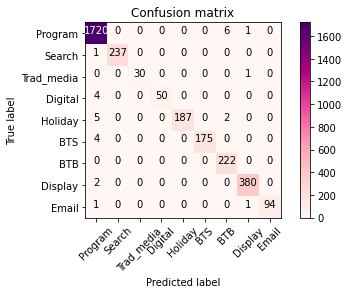

In [55]:
plot_confusion_matrix(cm, list(categories));

In [56]:
list(y_test).count("Program")

1727

In [57]:
len(y_test)

3123

## Pruebas

In [159]:
pruebas = ["¡Tec de Monterrey Back to School with Julio Profe!",
          "Tesla BTB program",
          "Washoe.com digital campagin",
          "60% off in Peso Pluma shirts this Black Friday",
          "Starbucks sells experience/Search Program",
          "AMG DoubleP August 2023 Email Campaign",
          "Best Buy 2022 direct mail",
          "Any other thing Program",
          "Search and destroy"]
expected = [5, 6, 3, 4, 1, 8, 2, 0, 1]

In [160]:
pruebas_test = pd.Series(pruebas).apply(lambda x: preprocess_text(x, added_stopwords))

In [161]:
pruebas_test

0               de monterrey back school julio
1                            tesla btb program
2                      washoe digital campagin
3               peso pluma shirts black friday
4    starbucks sells experience search program
5                   amg doublep email campaign
6                         best buy direct mail
7                                thing program
8                               search destroy
dtype: object

In [162]:
prueba_sequence = tokenizer.texts_to_sequences(pruebas_test)

In [163]:
pruebas_vect = pad_sequences(prueba_sequence, maxlen=max_length, padding="post")

In [164]:
pruebas_pred = model.predict(x=pruebas_vect)

In [165]:
prp = list(np.argmax(pruebas_pred, axis=-1))

In [166]:
dic

{'Program': 0,
 'Search': 1,
 'Trad_media': 2,
 'Digital': 3,
 'Holiday': 4,
 'BTS': 5,
 'BTB': 6,
 'Display': 7,
 'Email': 8}

In [167]:
print("Expected predictions: {}".format(expected))
print("Model predictions: {}".format(prp))

Expected predictions: [5, 6, 3, 4, 1, 8, 2, 0, 1]
Model predictions: [5, 6, 3, 4, 1, 8, 2, 0, 1]


## Llenar los UNKNOWN y Null values

In [356]:
df1_uk = pd.read_csv("MDF_US.csv", usecols=["program_name", "activity_subtype","activity_subtype_id", "reseller"])
df2_uk = pd.read_csv("aspcliamsdb_r_sptkpi.csv",usecols=["program_name", "activity_subtype","activity_subtype_id","reseller"])

In [357]:
df1_uk = df1_uk[mask_unknown1]
df2_uk = df2_uk[mask_unknown2]

In [358]:
df_uk = pd.concat([df1_uk, df2_uk],ignore_index=True)

In [359]:
df_uk["reseller"].value_counts()

Amazon                    4378
Best Buy                  3963
New Age                   2177
Microcenter               1076
D&H                       1002
Staples                    875
Office Depot               738
Target                     699
Amazon Canada              283
Aarons                     260
Costco                     242
Sams Club                  221
Essendant                  191
Microsoft                  158
Wal-Mart                   156
GameStop                   108
Supplies Network            77
Best Buy Canada             33
Synnex Canada               32
Staples Canada              22
SP RICHARDS                 11
Ingram Canada               11
Synnex                       9
WB Mason                     8
Walmart                      5
Costco Canada                3
Archbrook Laguna (ABL)       2
Name: reseller, dtype: int64

In [360]:
df_uk[df_uk["reseller"] == "GameStop"]

,program_name,reseller,activity_subtype,activity_subtype_id
104,GameStop July Promo 03/07/2022 - 30/07/2022,GameStop,UNKNOWN,UNKNOWN
249,GAMESTOP Feb Promo 01-30 2022 - 02-26-2022,GameStop,UNKNOWN,UNKNOWN
393,GameStop July Promo 03/07/2022 - 30/07/2022\t\t,GameStop,UNKNOWN,UNKNOWN
428,GameStop July Promo 03/07/2022 - 30/07/2022\t\t,GameStop,UNKNOWN,UNKNOWN
440,GameStop July Promo 03/07/2022 - 30/07/2022,GameStop,UNKNOWN,UNKNOWN
...,...,...,...,...
16105,GameStop May Promo 01/05/2022 - 04/06/2022,GameStop,UNKNOWN,UNKNOWN
16269,GameStop July Promo 03/07/2022 - 30/07/2022\t\t,GameStop,UNKNOWN,UNKNOWN
16288,GameStop May Promo 01/05/2022 - 04/06/2022,GameStop,UNKNOWN,UNKNOWN
16321,GameStop July Promo 03/07/2022 - 30/07/2022\t\t,GameStop,UNKNOWN,UNKNOWN


Now that we have the unknown DataFrame, we can clean it

In [361]:
mask_null = df_uk["program_name"].isna()

In [362]:
df_uk = df_uk[~mask_null].reset_index() # take away all rows with null values in program_name

Now we can do the predictions

In [363]:
clean_uk = df_uk["program_name"].apply(lambda x: preprocess_text(x, added_stopwords))

In [364]:
uk_sequence = tokenizer.texts_to_sequences(clean_uk)

In [365]:
uk_vect = pad_sequences(uk_sequence, maxlen=max_length, padding="post")

In [366]:
uk_pred = model.predict(x=uk_vect)

In [367]:
prp_uk = list(np.argmax(uk_pred, axis=-1))

We have the predictions, now we have to change them to the names

In [368]:
dic2 = {list(dic.values())[i]: list(dic.keys())[i] for i in range(len(dic))}

In [369]:
dic2

{0: 'Program',
 1: 'Search',
 2: 'Trad_media',
 3: 'Digital',
 4: 'Holiday',
 5: 'BTS',
 6: 'BTB',
 7: 'Display',
 8: 'Email'}

In [370]:
predictions_uk = [dic2[i] for i in prp_uk]

In [371]:
df_uk["activity_subtype"] = predictions_uk

In [372]:
df_uk["activity_subtype"].value_counts()

Program       11608
Display        4037
BTB             670
Search          230
Trad_media       95
BTS              42
Holiday          35
Email            21
Digital           1
Name: activity_subtype, dtype: int64

In [373]:
df_uk[df_uk["activity_subtype"] == "Email"]["program_name"]# This is the final DataFrame

1050           Email advertising support in Q221 
1810            Email advertising support in Q320
1956           Email advertising support in Q420 
2053           Email advertising support in Q421 
2570           Email advertising support in Q321 
2572        Q2 2020 CRM email advertising support
5438            Email advertising support in Q321
5500            Email advertising support in Q121
5859            Email advertising support in Q120
6576            Email advertising support in Q322
7253        Q2 2020 CRM email advertising support
7625            Email advertising support in Q320
7809           Email advertising support in Q420 
8017           Email advertising support in Q221 
11726          Email advertising support in Q421 
11811    Email Ad Support for January toner offer
13803                    Quill Laserjet NPI Email
13959       Email Ad Support for January Ink BOGO
14039          Email advertising support in Q222 
14771          Email advertising support in Q321 


In [374]:
df_uk[df_uk["activity_subtype"] == "Digital"]["program_name"]# This is the final DataFrame

14271    BBY Digital Insert to support Instant Ink
Name: program_name, dtype: object

In [375]:
df_uk[df_uk["activity_subtype"] == "Holiday"]["program_name"]

95               BBY Holiday Leadership Meeting - Training
178             HP+ New Products monetization prg may/june
852             CP – D&H Holding Cost – Q3 Pull-in for HOL
919           D&H Holiday '21/Spring '22 Meet Comp Support
1518                    Staples Early Reviews - New Inkjet
1552                        Gift CardsOctober-December2022
1860              New Age / Newegg 2C22 Ad Support Program
2281            HP+ New Products monetization prg may/june
2593     Micro Center Q123 AMD Holiday Support AMD-AMS-...
2854                        Gift CardsOctober-December2022
3948              New Age / Newegg 2C22 Ad Support Program
3968                        Gift CardsOctober-December2022
4860                    Staples Early Reviews - New Inkjet
6091     Micro Center Q123 AMD Holiday Support AMD-AMS-...
6274                 HP+ New Products monetization program
6931            HP+ New Products monetization prg may/june
7325                    Staples Early Reviews - New Inkj

In [411]:
"new" in list(df_features[df_features["y"] == "Holiday"]["feature"])

True

In [385]:
df_uk[df_uk["activity_subtype"] == "Holiday"]

,index,program_name,reseller,activity_subtype,activity_subtype_id
95,99,BBY Holiday Leadership Meeting - Training,Best Buy,Holiday,NaN
178,184,HP+ New Products monetization prg may/june,Office Depot,Holiday,NaN
852,873,CP – D&H Holding Cost – Q3 Pull-in for HOL,D&H,Holiday,UNKNOWN
919,942,D&H Holiday '21/Spring '22 Meet Comp Support,D&H,Holiday,NaN
1518,1550,Staples Early Reviews - New Inkjet,Staples,Holiday,NaN
1552,1584,Gift CardsOctober-December2022,Target,Holiday,UNKNOWN
1860,1899,New Age / Newegg 2C22 Ad Support Program,New Age,Holiday,NaN
2281,2333,HP+ New Products monetization prg may/june,Office Depot,Holiday,NaN
2593,2651,Micro Center Q123 AMD Holiday Support AMD-AMS-...,Microcenter,Holiday,NaN
2854,2915,Gift CardsOctober-December2022,Target,Holiday,UNKNOWN


In [394]:
clean_uk[178]

'new products monetization prg'

In [399]:
df_uk[df_uk["activity_subtype"] == "Display"]["program_name"]

1                       Target May Promo 5/1/2022-6/4/2022
5              Margin Enhancement Program FY'21-H2 Sep-Nov
12             Margin Enhancement Program FY'20-H2 Dec-Feb
24                            Amazon - October 2022 Promos
25                            Amazon - October 2022 Promos
                               ...                        
16730    Costco_Costco.com July 2021 - Apr 2022 Margin ...
16732    Costco_Costco.com July 2021 - Apr 2022 Margin ...
16735    Costco_Costco.com July 2021 - Apr 2022 Margin ...
16737    Costco_Costco.com July 2021 - Apr 2022 Margin ...
16738    Costco_Costco.com July 2021 - Apr 2022 Margin ...
Name: program_name, Length: 4037, dtype: object

In [404]:
"margin" in list(df_features[df_features["y"] == "Display"]["feature"])

True